<h2 align=center>Applications Data of Consumer Personal Loans : Prediction of Approval of Consumer Personal Loans Applications using different Machine Learning Algorithms.<h2>  

# Importing Needed Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,f1_score,log_loss

# Loading Dataset From CSV File

In [2]:
df1=pd.read_csv('Train Data.csv')
df2=pd.read_csv('Train Data.csv')
df1.sample(5)

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
139,CPL001493,M,Y,Kristel,Odlin,kodlin5h@vk.com,189 Johnson Point,2,Non Grad,N,5040.0,1716.0,36.0,360.0,1.0,Rural,6539896565,93-135-8409,Mozilla/5.0 (Windows; U; Windows NT 6.0; tr-TR...,N
275,CPL001900,M,Y,Renee,Dyster,rdysteraz@ning.com,88770 Fairfield Crossing,1,Grad,N,3300.0,2210.4,106.8,360.0,1.0,Semi U,5256164198,22-077-4818,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,Y
595,CPL002940,M,N,Ignazio,Sine,isinenn@theglobeandmail.com,82305 Del Mar Point,0,Non Grad,N,4599.6,0.0,110.0,360.0,1.0,Rural,4339542458,15-909-8523,Mozilla/5.0 (Windows; U; Windows NT 6.1; es-ES...,Y
254,CPL001844,M,N,Ulberto,Tregale,utregalea8@mit.edu,05608 Graedel Road,0,Grad,Y,19500.0,0.0,144.0,360.0,0.0,Urban,6393194103,88-973-3246,Mozilla/5.0 (X11; Linux i686) AppleWebKit/535....,N
492,CPL002571,M,N,Ky,Blackey,kblackeyjo@fastcompany.com,61417 Talisman Place,0,Non Grad,N,4429.2,0.0,48.0,360.0,1.0,Rural,211851469,58-392-3208,Mozilla/5.0 (X11; Linux i686) AppleWebKit/535....,Y


# Data Exploration, Preprocessing and Visualization

In [3]:
df1.drop(['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'], axis = 1, inplace = True)
df2.drop(['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'], axis = 1, inplace = True)

In [4]:
df2.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,Y
1,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
2,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
3,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
4,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y


In [5]:
df1_length=len(df1)
df2_col=len(df2.columns)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             601 non-null    object 
 1   Marital_Status  611 non-null    object 
 2   Dependents      599 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              582 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      612 non-null    float64
 8   CPL_Term        600 non-null    float64
 9   Credit_His      564 non-null    float64
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [7]:
df1['CPL_Status'].value_counts()

Y    422
N    192
Name: CPL_Status, dtype: int64

In [8]:
df1.groupby(['Sex'])['CPL_Status'].value_counts()

Sex  CPL_Status
F    Y              75
     N              37
M    Y             339
     N             150
Name: CPL_Status, dtype: int64

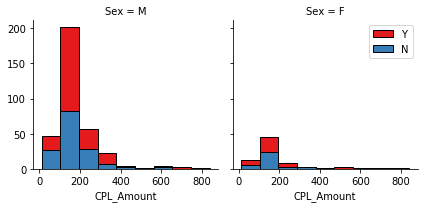

In [9]:
bins = np.linspace(df1.CPL_Amount.min(),df1.CPL_Amount.max(), 10)
g = sns.FacetGrid(df1, col='Sex', hue='CPL_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'CPL_Amount', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

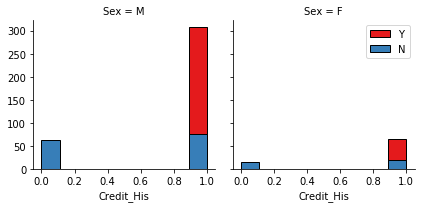

In [10]:
bins = np.linspace(df1.Credit_His.min(),df1.Credit_His.max(), 10)
g = sns.FacetGrid(df1, col='Sex', hue='CPL_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'Credit_His', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
df1.groupby(['Prop_Area'])['CPL_Status'].value_counts()

Prop_Area  CPL_Status
Rural      Y             110
           N              69
Semi U     Y             179
           N              54
Urban      Y             133
           N              69
Name: CPL_Status, dtype: int64

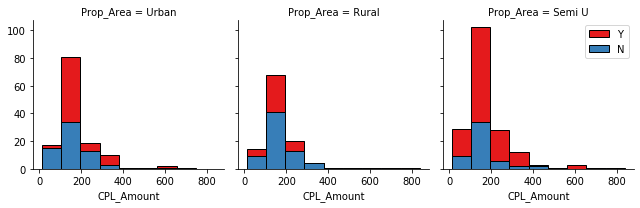

In [12]:
bins = np.linspace(df1.CPL_Amount.min(),df1.CPL_Amount.max(), 10)
g = sns.FacetGrid(df1, col='Prop_Area', hue='CPL_Status', palette="Set1", col_wrap=3)
g.map(plt.hist,'CPL_Amount', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [13]:
df1.groupby(['Marital_Status'])['CPL_Status'].value_counts()

Marital_Status  CPL_Status
N               Y             134
                N              79
Y               Y             285
                N             113
Name: CPL_Status, dtype: int64

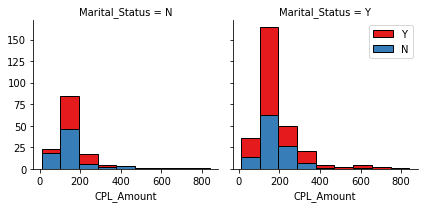

In [14]:
bins = np.linspace(df1.CPL_Amount.min(),df1.CPL_Amount.max(), 10)
g = sns.FacetGrid(df1, col='Marital_Status', hue='CPL_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'CPL_Amount', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [15]:
df1.groupby(['Qual_var'])['CPL_Status'].value_counts()

Qual_var  CPL_Status
Grad      Y             340
          N             140
Non Grad  Y              82
          N              52
Name: CPL_Status, dtype: int64

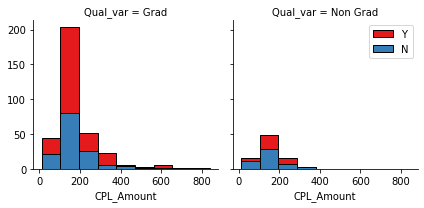

In [16]:
bins = np.linspace(df1.CPL_Amount.min(),df1.CPL_Amount.max(), 10)
g = sns.FacetGrid(df1, col='Qual_var', hue='CPL_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'CPL_Amount', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [17]:
df1.groupby(['SE'])['CPL_Status'].value_counts()

SE  CPL_Status
N   Y             343
    N             157
Y   Y              56
    N              26
Name: CPL_Status, dtype: int64

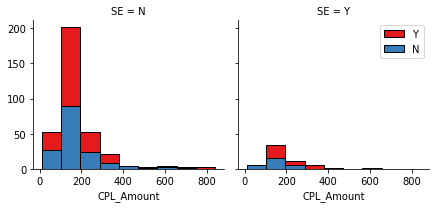

In [18]:
bins = np.linspace(df1.CPL_Amount.min(),df1.CPL_Amount.max(), 10)
g = sns.FacetGrid(df1, col='SE', hue='CPL_Status', palette="Set1", col_wrap=3)
g.map(plt.hist,'CPL_Amount', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [19]:
df1['Type']='Train' 
df2['Type']='Test'
df=pd.concat([df1,df2],axis=0)
df.isnull().sum()

Sex                26
Marital_Status      6
Dependents         30
Qual_var            0
SE                 64
App_Income_1        0
App_Income_2        0
CPL_Amount          4
CPL_Term           28
Credit_His        100
Prop_Area           0
CPL_Status          0
Type                0
dtype: int64

In [20]:
df['SE'].fillna('No',inplace=True)
df['CPL_Amount'].fillna(df['CPL_Amount'].mean(), inplace=True)
df['CPL_Term'].fillna(df['CPL_Term'].mean(), inplace=True)
df['App_Income_1'].fillna(df['App_Income_1'].mean(), inplace=True)
df['App_Income_2'].fillna(df['App_Income_1'].mean(), inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['CPL_Amount'].fillna(df['CPL_Term'].mode()[0], inplace=True)
df['Credit_His'].fillna(df['Credit_His'].mode()[0], inplace=True)
cat=['Sex','Marital_Status','Dependents','Qual_var','SE','Credit_His','Prop_Area']
for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Sex                 int32
Marital_Status      int32
Dependents          int32
Qual_var            int32
SE                  int32
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His          int32
Prop_Area           int32
CPL_Status         object
Type               object
dtype: object

# Feature Selection/Extraction

In [21]:
Feature=df[['Sex','Marital_Status','Dependents','Qual_var','SE','CPL_Amount','CPL_Term','Credit_His', 'Prop_Area',]]

In [22]:
X = Feature
X[0:5]

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area
0,1,0,0,0,0,175.805882,360.0,1,2
1,1,1,1,0,0,153.600000,360.0,1,0
2,1,1,0,0,2,79.200000,360.0,1,2
3,1,1,0,1,0,144.000000,360.0,1,2
4,1,0,0,0,0,169.200000,360.0,1,2


In [23]:
y = df['CPL_Status'].values
y[0:20]

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y'], dtype=object)

# Splitting Dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=32)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (982, 9) (982,)
Test set: (246, 9) (246,)


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr_pred=lr.predict(X_test)
lr_pred_prob = lr.predict_proba(X_test)

In [27]:
print("LR Accuray: %.2f" % accuracy_score(y_test,lr_pred))
print("LR F1-score: %.2f" % f1_score(y_test,lr_pred,average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test,lr_pred_prob ))

LR Accuray: 0.84
LR F1-score: 0.81
LR LogLoss: 0.44


# Support Vector Classifier

In [28]:
from sklearn import svm
svm=svm.SVC(kernel='linear', C=0.1)
svm.fit(X_train,y_train) 

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
svm_pred=svm.predict(X_test)
print("SVM Accuray: %.2f" % accuracy_score(y_test,svm_pred))
print("SVM F1-score: %.2f" % f1_score(y_test,svm_pred,average='weighted'))

SVM Accuray: 0.84
SVM F1-score: 0.81


# K-nearest Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier
score=[]
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.8902439024390244
2 :  0.7276422764227642
3 :  0.6056910569105691
4 :  0.6138211382113821
5 :  0.7398373983739838
6 :  0.6951219512195121
7 :  0.6788617886178862
8 :  0.6544715447154471
9 :  0.7195121951219512


1  :  89.02 %


Text(0, 0.5, 'Accuracy')

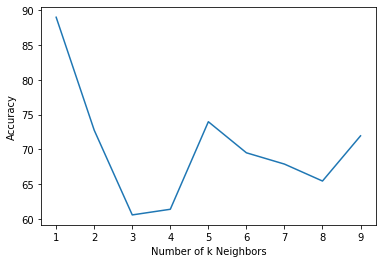

In [31]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')
plt.plot(range(1,10),score)
plt.xlabel('Number of k Neighbors')
plt.ylabel('Accuracy')

In [32]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print("KNN Accuray: %.2f" % accuracy_score(y_test,knn_pred))
print("KNN F1-score: %.2f" % f1_score(y_test,knn_pred,average='weighted'))

KNN Accuray: 0.89
KNN F1-score: 0.89


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=20,max_features=8)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
dt_pred=dt.predict(X_test)

In [35]:
print("DT Accuray: %.2f" % accuracy_score(y_test,dt_pred))
print("DT F1-score: %.2f" % f1_score(y_test,dt_pred,average='weighted'))

DT Accuray: 0.91
DT F1-score: 0.91


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=20,max_features=8)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rf_pred=rf.predict(X_test)

In [38]:
print("RF Accuray: %.2f" % accuracy_score(y_test,rf_pred))
print("RF F1-score: %.2f" % f1_score(y_test,rf_pred,average='weighted'))

RF Accuray: 0.91
RF F1-score: 0.91


# XGB Classifier

In [39]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
xgb_pred = xgb.predict(X_test)

In [41]:
print("XGB Accuray: %.2f" % accuracy_score(y_test,xgb_pred))
print("XGB F1-score: %.2f" % f1_score(y_test,xgb_pred,average='weighted'))

XGB Accuray: 0.88
XGB F1-score: 0.88


# Report

| Algorithm               | Accuracy | F1-score | LogLoss |
|-------------------------|--------- |----------|---------|
|LogisticRegression       | 0.84     | 0.81     | 0.44    |
|Support Vector Classifier| 0.84     | 0.81     | NA      |
|K-nearest Neignbor       | 0.89     | 0.89     | NA      |
|Decision Tree            | 0.91     | 0.91     | NA      |
|Random Forest            | 0.91     | 0.91     | NA      |
|XGBoost                  | 0.88     | 0.88     | NA      |